In [1]:
import os
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import librosa.display
import IPython.display as ipd

#### Pathological Dataset

In [3]:
for file in os.listdir('Male_Female_Pathological_Dataset/'):
    print(file)

101-a_n.wav
1037-a_n.wav
1038-a_n.wav
1039-a_n.wav
1040-a_n.wav
1041-a_n.wav
1042-a_n.wav
1043-a_n.wav
1044-a_n.wav
1045-a_n.wav
1046-a_n.wav
1047-a_n.wav
1048-a_n.wav
1049-a_n.wav
105-a_n.wav
1050-a_n.wav
1051-a_n.wav
1052-a_n.wav
1053-a_n.wav
1054-a_n.wav
1055-a_n.wav
1056-a_n.wav
1057-a_n.wav
1058-a_n.wav
106-a_n.wav
107-a_n.wav
108-a_n.wav
1083-a_n.wav
1084-a_n.wav
1085-a_n.wav
1086-a_n.wav
1087-a_n.wav
1088-a_n.wav
1089-a_n.wav
109-a_n.wav
1090-a_n.wav
110-a_n.wav
111-a_n.wav
1113-a_n.wav
1115-a_n.wav
1116-a_n.wav
1117-a_n.wav
1118-a_n.wav
1119-a_n.wav
1120-a_n.wav
1156-a_n.wav
1157-a_n.wav
1158-a_n.wav
1159-a_n.wav
1160-a_n.wav
1161-a_n.wav
1162-a_n.wav
1163-a_n.wav
1164-a_n.wav
1165-a_n.wav
1166-a_n.wav
118-a_n.wav
1186-a_n.wav
1187-a_n.wav
1188-a_n.wav
1189-a_n.wav
119-a_n.wav
1190-a_n.wav
1191-a_n.wav
1192-a_n.wav
1193-a_n.wav
1194-a_n.wav
1195-a_n.wav
1196-a_n.wav
1197-a_n.wav
1198-a_n.wav
1199-a_n.wav
120-a_n.wav
1200-a_n.wav
1201-a_n.wav
1202-a_n.wav
1203-a_n.wav
1204-a_n.w

In [4]:
filename = 'Male_Female_Pathological_Dataset/101-a_n.wav'

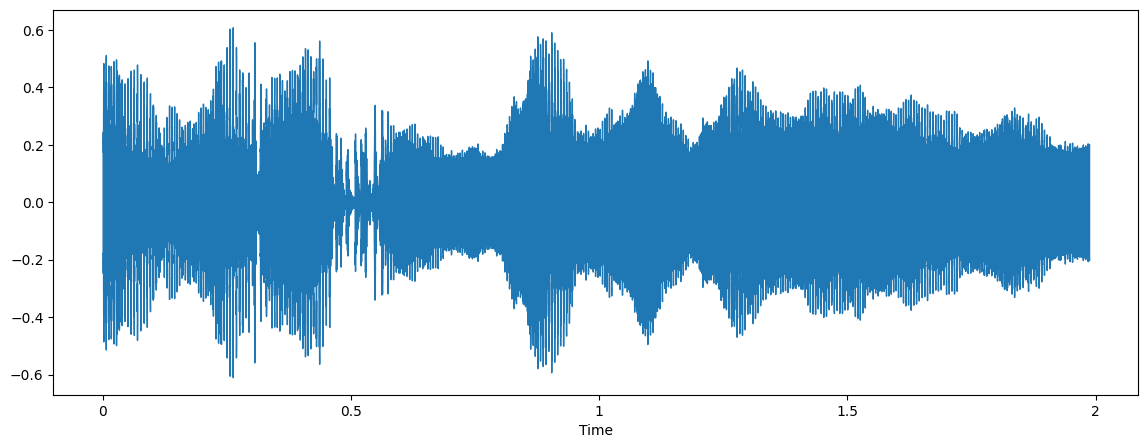

In [5]:
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data)
ipd.Audio(filename)

In [6]:
# !dir

In [7]:
data.shape

(43815,)

In [8]:
sample_rate

22050

In [9]:
# Duration of Audio file in seconds
time = data.shape[0]/sample_rate
time

1.9870748299319727

In [10]:
# Finding fft and converting it to power spectrum
def fft_calculation(data):
    fft = np.fft.fft(data)
    magnitude = np.abs(fft)
    frequency = np.linspace(0, sample_rate, len(magnitude))
    left_frequency = frequency[:int(len(frequency)/2)]
    left_magnitude = magnitude[:int(len(frequency)/2)]

    plt.plot(left_frequency, left_magnitude)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.show()

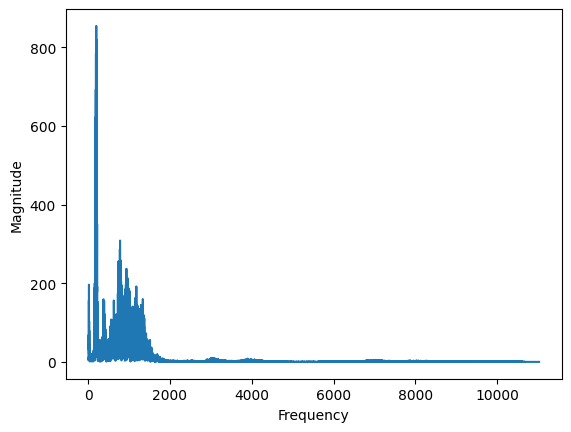

In [11]:
fft_calculation(data)

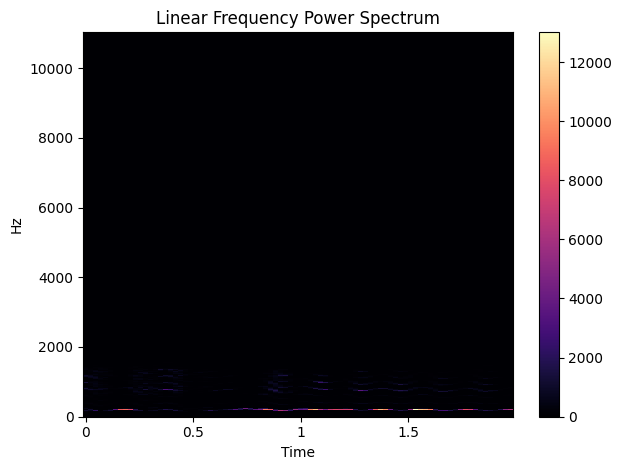

In [12]:
# Finding stft and converting it to spectogram
n_fft = 2048 # Size of the fft, which will also be used as the window length
hop_length = 512 # step or stride between windows. If the step is smaller than window length, then windows will overlap
window_type = 'hann' # specify the window type for fft/stft

stft = librosa.stft(data, hop_length=hop_length, n_fft=n_fft, win_length=n_fft, window=window_type, pad_mode='reflect')
spectrogram = np.abs(stft)**2

librosa.display.specshow(spectrogram, sr=sample_rate, x_axis='time', y_axis='linear', hop_length=hop_length)
plt.title("Linear Frequency Power Spectrum")
plt.colorbar()
plt.tight_layout()
plt.show()

In [13]:
spectrogram.shape

(1025, 86)

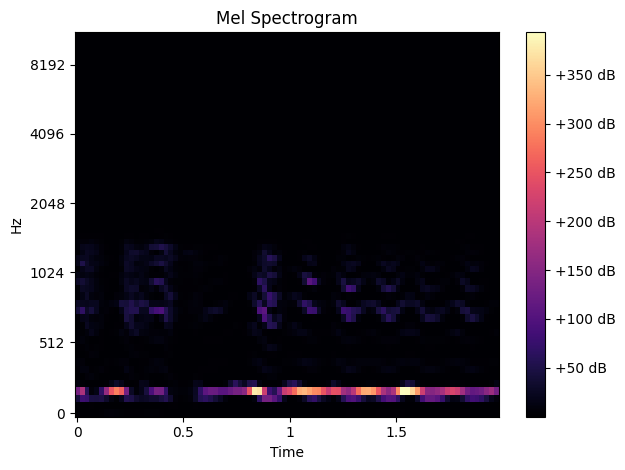

In [14]:
# Creating mel spectrogram
mel_bins = 64 # number of mel bands

mel_spectrogram = librosa.feature.melspectrogram(y=data, sr= sample_rate, hop_length=hop_length, n_fft=n_fft, win_length=n_fft, window=window_type, n_mels = mel_bins)

librosa.display.specshow(mel_spectrogram, sr=sample_rate, x_axis='time', y_axis='mel', hop_length=hop_length)
plt.title("Mel Spectrogram")
plt.colorbar(format="%+2.0f dB")
plt.tight_layout()
plt.show()

In [15]:
mel_spectrogram.shape

(64, 86)

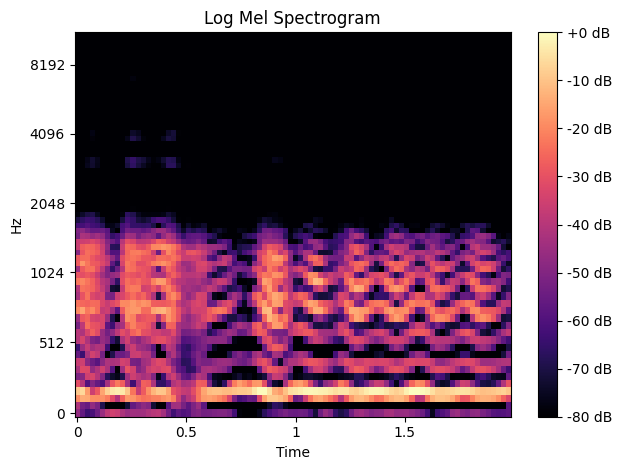

In [16]:
# Creating log_mel spectrogram
mel_spectrogram_db = librosa.amplitude_to_db(mel_spectrogram, ref= np.max)

librosa.display.specshow(mel_spectrogram_db, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title("Log Mel Spectrogram")
plt.colorbar(format="%+2.0f dB")
plt.tight_layout()
plt.show()

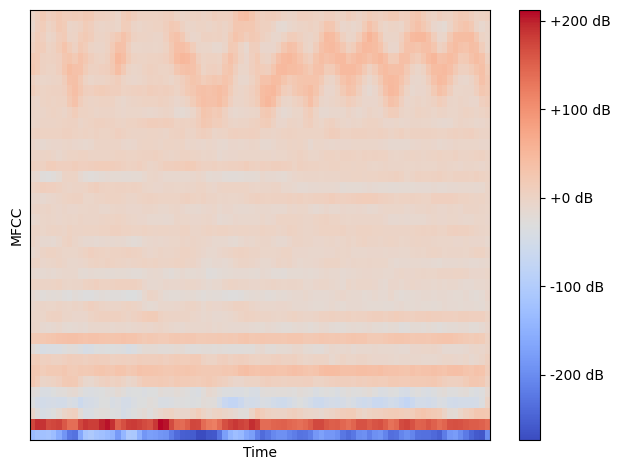

In [17]:
# Finding mfccs
mfccs_features = librosa.feature.mfcc(y=data, n_fft=n_fft, hop_length=hop_length, n_mfcc=40)

librosa.display.specshow(mfccs_features, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar(format="%+2.0f dB")
plt.tight_layout()
plt.show()

In [18]:
mfccs_features.shape

(40, 86)

In [19]:
mfccs_features

array([[-1.32828827e+02, -1.21913620e+02, -1.22375404e+02, ...,
        -2.57138885e+02, -2.62588043e+02, -1.98718628e+02],
       [ 1.73755905e+02,  1.91431839e+02,  1.87817505e+02, ...,
         1.53937683e+02,  1.50924988e+02,  1.40989532e+02],
       [-5.09344482e+00, -2.60296631e+01, -4.35233841e+01, ...,
         2.45120964e+01,  2.41494522e+01,  2.24073257e+01],
       ...,
       [-2.83003569e-01,  1.38153248e+01,  8.00831795e+00, ...,
         2.54229164e+01, -1.18451357e-01, -5.98764515e+00],
       [-8.91153240e+00,  7.85228395e+00,  1.39344273e+01, ...,
        -7.91912556e-01, -1.05161648e+01, -4.22266102e+00],
       [-4.62818670e+00,  6.14574194e+00,  2.00237389e+01, ...,
         5.47945082e-01,  2.46430635e+00,  5.56303215e+00]], dtype=float32)

## Reading Dataset

In [20]:
import pandas as pd
df1=pd.read_excel('Healthy_data.xlsx')
df2=pd.read_excel('Pathological_data.xlsx')
df=pd.concat([df1,df2], ignore_index=True)
df.head(10)

,Recording Id,Type,Gender,Age,Diagnosis Notes,Pathology,Audio
0,1,n,w,20,Normal,Normal,1-a_n.wav
1,2,n,w,22,Normal,Normal,2-a_n.wav
2,3,n,w,23,Normal,Normal,3-a_n.wav
3,4,n,m,22,Normal,Normal,4-a_n.wav
4,5,n,m,22,Normal,Normal,5-a_n.wav
5,6,n,w,20,Normal,Normal,6-a_n.wav
6,7,n,w,19,Normal,Normal,7-a_n.wav
7,27,n,w,20,Normal,Normal,27-a_n.wav
8,17,n,w,19,Normal,Normal,17-a_n.wav
9,8,n,w,19,Normal,Normal,8-a_n.wav


In [21]:
df.shape

(1490, 7)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Recording Id     1490 non-null   int64 
 1   Type             1490 non-null   object
 2   Gender           1490 non-null   object
 3   Age              1490 non-null   int64 
 4   Diagnosis Notes  1400 non-null   object
 5   Pathology        1490 non-null   object
 6   Audio            1490 non-null   object
dtypes: int64(2), object(5)
memory usage: 81.6+ KB


In [23]:
type_gender_count = df.groupby(["Type","Gender"])[['Audio']].count()
type_gender_count

Audio
Type Gender       
n    m         259
     w         428
p    m         302
     w         501

<Axes: xlabel='Type,Gender'>

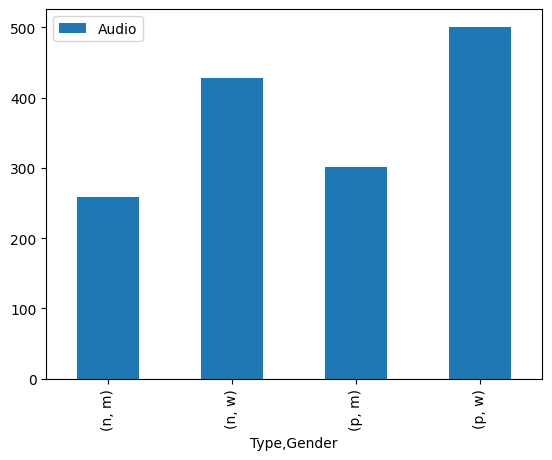

In [24]:
type_gender_count.plot.bar()

### Frequency plot for Gender vs pathological category

In [25]:
gender = df.Gender.unique()
pathology = df.Pathology.unique()
print(gender)
print(pathology)

['w' 'm']
['Normal' 'Dysphonia' 'Laryngitis' 'Recurrent palsy']


In [26]:
# Finding fft and converting it to power spectrum
def fft_calculation(data, i, j):
    fft = np.fft.fft(data)
    magnitude = np.abs(fft)
    frequency = np.linspace(0, sample_rate, len(magnitude))
    
    left_frequency = frequency[:int(len(frequency)/2)]
    left_magnitude = magnitude[:int(len(frequency)/2)]
    print(str(gender[i])+" vs "+str(pathology[j])+" :- "+str(left_frequency[np.where(left_magnitude == max(left_magnitude))[0][0]]))

    axes[i][j].plot(left_frequency, left_magnitude)
    plt.xlabel("Frequency")  # Set x-label
    plt.ylabel("Magnitude")  # Set y-label

w vs Normal :- 820.1834221735993
w vs Dysphonia :- 215.92833058325562
w vs Laryngitis :- 202.63897956109076
w vs Recurrent palsy :- 264.022450888681
m vs Normal :- 610.5449591280654
m vs Dysphonia :- 586.2829478214094
m vs Laryngitis :- 663.8532110091744
m vs Recurrent palsy :- 95.64965592423519


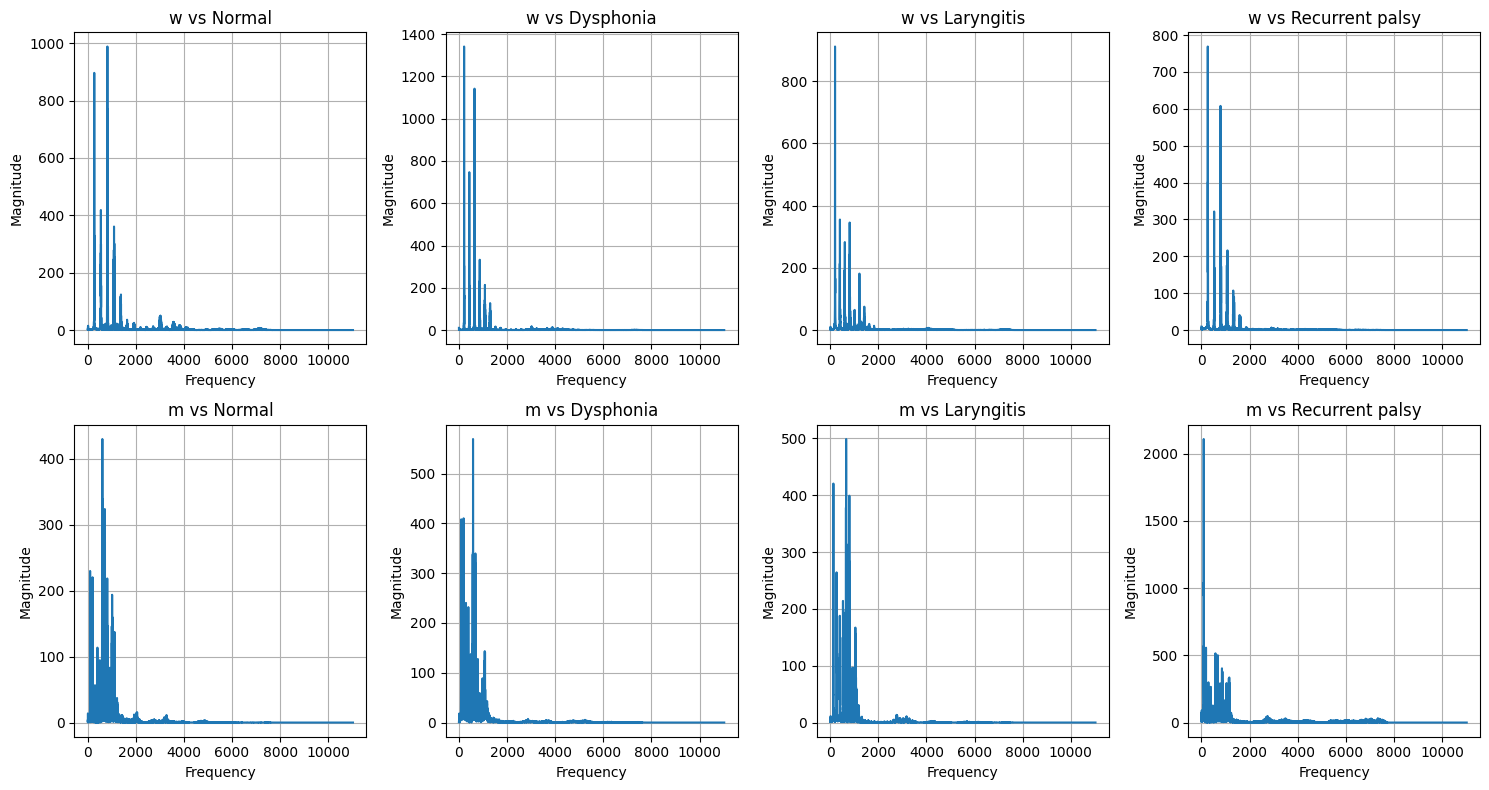

In [27]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8), squeeze=False)

for i in range(2):
    for j in range(4):
        gender_pathological_df = df[np.logical_and(df.Gender==gender[i],df.Pathology==pathology[j])]
        data, sample_rate = librosa.load("Filtered_Audio_Dataset/"+gender_pathological_df.Audio.values[0])
        fft_calculation(data, i, j)
        plt.sca(axes[i][j])
        plt.title(str(gender[i])+" vs "+str(pathology[j]))
        plt.tight_layout()
        plt.grid(True)

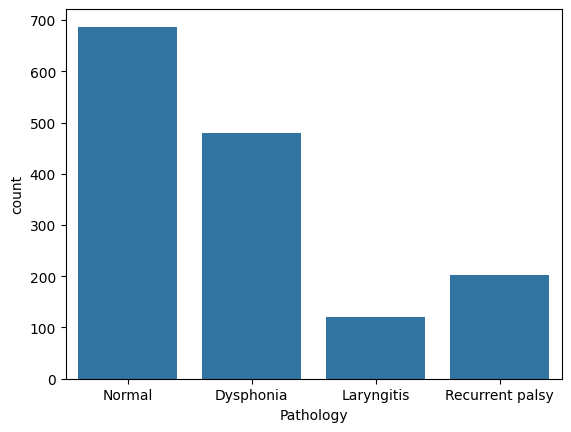

In [28]:
sns.countplot(x=df["Pathology"])
plt.show()

<Axes: xlabel='Type', ylabel='count'>

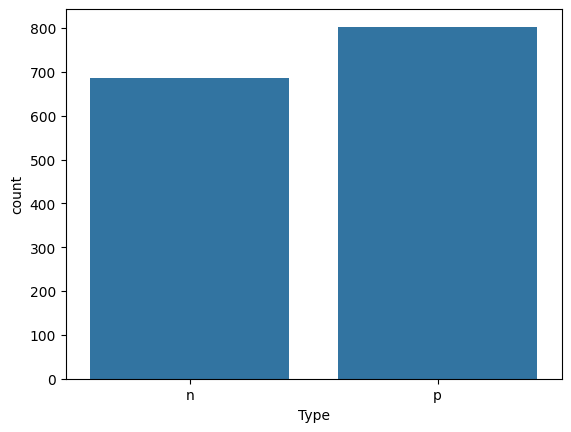

In [29]:
sns.countplot(x=df['Type'])

In [30]:
df["Age"].value_counts().sort_values(ascending= False).head(10)

Age
20    123
21     94
22     69
19     66
23     50
36     45
59     33
60     32
32     30
24     30
Name: count, dtype: int64

<Axes: ylabel='Density'>

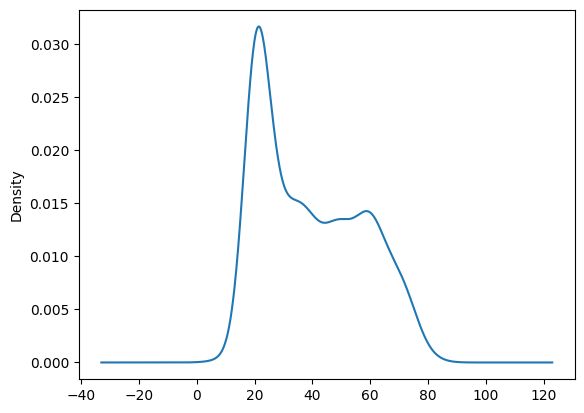

In [31]:
df["Age"].plot.kde()

## Extract Features

In [32]:
mfccs = librosa.feature.mfcc(y=data, n_mfcc=80)
print(mfccs.shape)

(80, 87)


In [33]:
mfccs

array([[-113.613    ,  -89.01245  ,  -96.09805  , ..., -122.339096 ,
        -115.17272  , -131.32349  ],
       [ 143.46376  ,  152.82028  ,  162.12552  , ...,  148.42282  ,
         145.6359   ,  137.04434  ],
       [  -3.917379 ,  -19.928009 ,  -27.019974 , ...,  -30.516018 ,
         -25.041967 ,   -8.090624 ],
       ...,
       [  -5.252745 ,   -1.0948491,    2.6629157, ...,    7.357658 ,
           6.5301757,    4.1670647],
       [  -4.2366934,    1.1966839,    4.222116 , ...,    9.093587 ,
           5.7590275,    2.0302086],
       [  -2.3465881,   -4.0526004,   -4.7780204, ...,    5.0549297,
           2.9839945,    0.2255072]], dtype=float32)

In [34]:
## Extracting MFCC's for every audio file
import pandas as pd
import os

audio_dataset_path = 'Filtered_Audio_Dataset/'

In [35]:
def features_extraction(file):
    audio, sample_rate = librosa.load(file_name)
    mfccs_features = librosa.feature.mfcc(y=audio, n_mfcc=80)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    return mfccs_scaled_features

In [36]:
import numpy as np
from tqdm import tqdm

extracted_features=[]
for index_num,row in tqdm(df.iterrows()):
    file_name = audio_dataset_path+row["Audio"]
    final_class_labels = row["Type"]
    data = features_extraction(file_name)
    extracted_features.append([data,final_class_labels])

1490it [00:26, 55.34it/s]


In [37]:
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature','class'])
extracted_features_df.head(10)

,feature,class
0,"[-261.49933, 114.805534, -72.840965, -0.931277...",n
1,"[-202.87245, 145.96022, -68.10183, -11.444383,...",n
2,"[-167.76535, 133.49133, -77.94643, -9.826728, ...",n
3,"[-279.40063, 208.5046, -43.03498, -5.360972, -...",n
4,"[-172.24774, 175.08725, -75.93269, 8.99103, -6...",n
5,"[-205.02122, 137.12006, -66.55497, -12.496069,...",n
6,"[-217.24478, 145.07858, -100.58555, 2.7787614,...",n
7,"[-227.11813, 127.75929, -63.862732, -13.961372...",n
8,"[-196.28305, 113.32672, -99.92175, 1.0585632, ...",n
9,"[-207.56131, 135.24808, -61.779488, -17.637135...",n


In [38]:
extracted_features_df.shape

(1490, 2)

In [39]:
extracted_features_df["feature"][0]

array([-2.61499329e+02,  1.14805534e+02, -7.28409653e+01, -9.31277871e-01,
       -6.87778549e+01, -2.90463376e+00,  4.69877529e+00,  7.56695986e+00,
       -3.33707962e+01,  1.76828156e+01, -4.03612089e+00, -1.42697287e+01,
        9.20465565e+00, -2.80942898e+01, -1.00394077e+01, -1.63144569e+01,
       -9.73753095e-01, -4.31138134e+00, -9.75323021e-01, -1.19480648e+01,
        4.30604649e+00, -9.05258274e+00,  8.25730264e-02,  4.08039131e+01,
        2.39141750e+01,  6.14854851e+01,  3.20326614e+01,  8.02177048e+00,
       -2.74810147e+00, -9.03449821e+00,  4.29856348e+00, -1.17523634e+00,
        1.33330641e+01, -6.40946245e+00, -1.52622843e+01, -5.44703770e+00,
        1.03529129e+01, -3.11023307e+00, -8.39600277e+00, -7.93014669e+00,
       -5.57793570e+00,  1.33628864e+01, -4.67780113e+00, -1.73656483e+01,
       -1.20797033e+01,  3.30997729e+00, -6.23456812e+00,  1.79914856e+00,
        1.81635227e+01,  3.11546078e+01,  3.39731293e+01,  2.36189723e+00,
        3.56650442e-01,  

In [40]:
## Label Encoding
dummy_data = pd.get_dummies(extracted_features_df['class'])

In [41]:
dummy_data

,n,p
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
1485,False,True
1486,False,True
1487,False,True
1488,False,True


In [42]:
x=np.array(extracted_features_df['feature'].values.tolist())
y=dummy_data

In [43]:
x.shape

(1490, 80)

In [44]:
y.shape

(1490, 2)

In [45]:
### Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify= y, test_size=0.2,random_state=0)

In [46]:
x_train.shape

(1192, 80)

In [47]:
x_test.shape

(298, 80)

In [48]:
y_train.shape

(1192, 2)

In [49]:
y_test.shape

(298, 2)

## Model Training

In [50]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
## No. of classes
num_labels=y.shape[1]
num_labels

2

In [53]:
model=Sequential()
## first layer
model.add(Dense(256,input_shape=(80,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## second layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## third layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## final Layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [54]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               20736     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               1

In [56]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs=150
num_batch_size=32

checkpointer=ModelCheckpoint(filepath='/audio_classification.hdf5', verbose=1, save_best_only=True)
start=datetime.now()

model.fit(x_train,y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test,y_test), callbacks=[checkpointer])
duration=datetime.now()-start

print("Training completed in time: ",duration)

Epoch 1/150
32/38 [========================>.....] - ETA: 0s - loss: 10.8590 - accuracy: 0.4971
Epoch 1: val_loss improved from inf to 1.16552, saving model to /audio_classification.hdf5
38/38 [==============================] - 3s 26ms/step - loss: 10.2893 - accuracy: 0.5000 - val_loss: 1.1655 - val_accuracy: 0.6007
Epoch 2/150
 7/38 [====>.........................] - ETA: 0s - loss: 5.0737 - accuracy: 0.5402

C:\Anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


37/38 [============================>.] - ETA: 0s - loss: 4.3439 - accuracy: 0.5490
Epoch 2: val_loss improved from 1.16552 to 0.74436, saving model to /audio_classification.hdf5
38/38 [==============================] - 1s 14ms/step - loss: 4.3200 - accuracy: 0.5487 - val_loss: 0.7444 - val_accuracy: 0.5638
Epoch 3/150
32/38 [========================>.....] - ETA: 0s - loss: 2.8369 - accuracy: 0.5439
Epoch 3: val_loss improved from 0.74436 to 0.70161, saving model to /audio_classification.hdf5
38/38 [==============================] - 0s 13ms/step - loss: 2.7911 - accuracy: 0.5394 - val_loss: 0.7016 - val_accuracy: 0.5839
Epoch 4/150
35/38 [==========================>...] - ETA: 0s - loss: 2.0172 - accuracy: 0.5286
Epoch 4: val_loss improved from 0.70161 to 0.68900, saving model to /audio_classification.hdf5
38/38 [==============================] - 1s 14ms/step - loss: 2.0208 - accuracy: 0.5235 - val_loss: 0.6890 - val_accuracy: 0.6040
Epoch 5/150
33/38 [=========================>....] -

Epoch 31/150
34/38 [=========================>....] - ETA: 0s - loss: 0.6326 - accuracy: 0.6498
Epoch 31: val_loss did not improve from 0.64070
38/38 [==============================] - 0s 11ms/step - loss: 0.6264 - accuracy: 0.6560 - val_loss: 0.6428 - val_accuracy: 0.6040
Epoch 32/150
35/38 [==========================>...] - ETA: 0s - loss: 0.5909 - accuracy: 0.6911
Epoch 32: val_loss improved from 0.64070 to 0.62648, saving model to /audio_classification.hdf5
38/38 [==============================] - 1s 13ms/step - loss: 0.5915 - accuracy: 0.6904 - val_loss: 0.6265 - val_accuracy: 0.6409
Epoch 33/150
35/38 [==========================>...] - ETA: 0s - loss: 0.6060 - accuracy: 0.6714
Epoch 33: val_loss improved from 0.62648 to 0.62034, saving model to /audio_classification.hdf5
38/38 [==============================] - 0s 13ms/step - loss: 0.6041 - accuracy: 0.6703 - val_loss: 0.6203 - val_accuracy: 0.6477
Epoch 34/150
36/38 [===========================>..] - ETA: 0s - loss: 0.6044 - acc

Epoch 59/150
36/38 [===========================>..] - ETA: 0s - loss: 0.4786 - accuracy: 0.7622
Epoch 59: val_loss did not improve from 0.58826
38/38 [==============================] - 0s 10ms/step - loss: 0.4799 - accuracy: 0.7592 - val_loss: 0.6019 - val_accuracy: 0.6544
Epoch 60/150
33/38 [=========================>....] - ETA: 0s - loss: 0.4578 - accuracy: 0.7775
Epoch 60: val_loss did not improve from 0.58826
38/38 [==============================] - 0s 11ms/step - loss: 0.4559 - accuracy: 0.7777 - val_loss: 0.6064 - val_accuracy: 0.6678
Epoch 61/150
34/38 [=========================>....] - ETA: 0s - loss: 0.4339 - accuracy: 0.7923
Epoch 61: val_loss did not improve from 0.58826
38/38 [==============================] - 0s 11ms/step - loss: 0.4366 - accuracy: 0.7861 - val_loss: 0.6122 - val_accuracy: 0.6913
Epoch 62/150
35/38 [==========================>...] - ETA: 0s - loss: 0.4552 - accuracy: 0.7768
Epoch 62: val_loss did not improve from 0.58826
38/38 [===========================

Epoch 89/150
36/38 [===========================>..] - ETA: 0s - loss: 0.2979 - accuracy: 0.8663
Epoch 89: val_loss did not improve from 0.58826
38/38 [==============================] - 0s 12ms/step - loss: 0.2975 - accuracy: 0.8658 - val_loss: 0.8178 - val_accuracy: 0.6946
Epoch 90/150
38/38 [==============================] - ETA: 0s - loss: 0.2959 - accuracy: 0.8649
Epoch 90: val_loss did not improve from 0.58826
38/38 [==============================] - 0s 11ms/step - loss: 0.2959 - accuracy: 0.8649 - val_loss: 0.8278 - val_accuracy: 0.7081
Epoch 91/150
33/38 [=========================>....] - ETA: 0s - loss: 0.3117 - accuracy: 0.8674
Epoch 91: val_loss did not improve from 0.58826
38/38 [==============================] - 0s 11ms/step - loss: 0.3105 - accuracy: 0.8666 - val_loss: 0.7902 - val_accuracy: 0.6711
Epoch 92/150
38/38 [==============================] - ETA: 0s - loss: 0.3027 - accuracy: 0.8532
Epoch 92: val_loss did not improve from 0.58826
38/38 [===========================

Epoch 119/150
34/38 [=========================>....] - ETA: 0s - loss: 0.1927 - accuracy: 0.9164
Epoch 119: val_loss did not improve from 0.58826
38/38 [==============================] - 0s 11ms/step - loss: 0.1938 - accuracy: 0.9136 - val_loss: 1.1266 - val_accuracy: 0.6980
Epoch 120/150
38/38 [==============================] - ETA: 0s - loss: 0.2289 - accuracy: 0.9128
Epoch 120: val_loss did not improve from 0.58826
38/38 [==============================] - 0s 11ms/step - loss: 0.2289 - accuracy: 0.9128 - val_loss: 1.1011 - val_accuracy: 0.7081
Epoch 121/150
33/38 [=========================>....] - ETA: 0s - loss: 0.2103 - accuracy: 0.8958
Epoch 121: val_loss did not improve from 0.58826
38/38 [==============================] - 0s 11ms/step - loss: 0.2070 - accuracy: 0.8993 - val_loss: 1.1625 - val_accuracy: 0.7148
Epoch 122/150
32/38 [========================>.....] - ETA: 0s - loss: 0.2159 - accuracy: 0.9092
Epoch 122: val_loss did not improve from 0.58826
38/38 [===================

Epoch 149/150
33/38 [=========================>....] - ETA: 0s - loss: 0.1526 - accuracy: 0.9470
Epoch 149: val_loss did not improve from 0.58826
38/38 [==============================] - 0s 11ms/step - loss: 0.1516 - accuracy: 0.9446 - val_loss: 1.4083 - val_accuracy: 0.7047
Epoch 150/150
33/38 [=========================>....] - ETA: 0s - loss: 0.1765 - accuracy: 0.9223
Epoch 150: val_loss did not improve from 0.58826
38/38 [==============================] - 0s 11ms/step - loss: 0.1684 - accuracy: 0.9253 - val_loss: 1.3121 - val_accuracy: 0.6812
Training completed in time:  0:01:08.400454


In [57]:
test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print(test_accuracy[1])

0.681208074092865


In [58]:
y_pred = model.predict(x_test)

10/10 [==============================] - 0s 4ms/step


In [67]:
y_pred

array([[6.27123192e-02, 9.37287629e-01],
       [1.17703147e-01, 8.82296801e-01],
       [9.99942660e-01, 5.72985700e-05],
       [8.46799135e-01, 1.53200909e-01],
       [1.80264458e-01, 8.19735527e-01],
       [6.03296123e-02, 9.39670444e-01],
       [8.88224602e-01, 1.11775368e-01],
       [4.36373884e-05, 9.99956369e-01],
       [8.38658512e-01, 1.61341533e-01],
       [3.47554445e-01, 6.52445614e-01],
       [2.55451323e-06, 9.99997497e-01],
       [3.63559455e-01, 6.36440516e-01],
       [9.87526059e-01, 1.24740070e-02],
       [4.77549545e-02, 9.52245116e-01],
       [8.23610485e-01, 1.76389530e-01],
       [2.89412051e-01, 7.10587978e-01],
       [9.99999762e-01, 2.92475534e-07],
       [2.57838721e-04, 9.99742210e-01],
       [7.45097941e-06, 9.99992490e-01],
       [9.01922405e-01, 9.80776474e-02],
       [7.37156928e-01, 2.62843072e-01],
       [1.38359308e-01, 8.61640692e-01],
       [9.50816810e-01, 4.91831899e-02],
       [7.98374295e-01, 2.01625675e-01],
       [8.348271

In [59]:
y_test.values

array([[False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ Tr

10/10 [==============================] - 0s 4ms/step


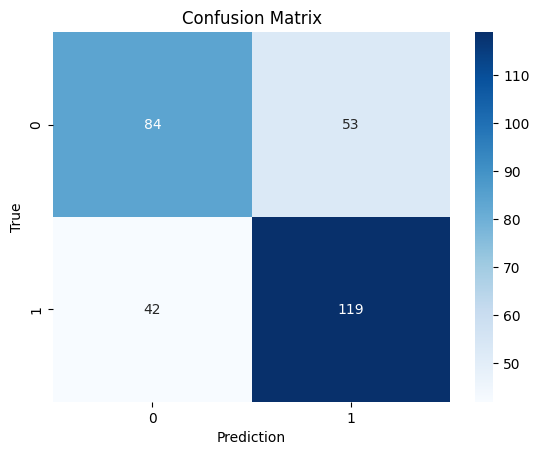

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

#compute confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

#Plot confusion matrix
sns.heatmap( conf_matrix, annot=True, fmt='d', cmap= 'Blues')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [70]:
dummy_data

,n,p
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
1485,False,True
1486,False,True
1487,False,True
1488,False,True


## Model Evaluation

In [60]:
filename = 'Male_Female_Healthy_Dataset/1099-a_n.wav'

In [61]:
feature_df = pd.DataFrame(features_extraction(filename)).transpose()

In [62]:
feature_df

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-182.332748,138.173431,-84.687096,10.047243,-48.317905,9.40225,2.296518,4.65991,-13.330125,9.432405,...,-3.532734,1.599048,2.740876,-0.671063,1.497601,-0.059052,-2.493449,-0.113035,5.037437,-0.590547


In [63]:
features = np.array(feature_df.values.tolist())

In [64]:
features.shape

(1, 80)

In [65]:
model.predict(features)

1/1 [==============================] - 0s 42ms/step


array([[0.37617868, 0.6238213 ]], dtype=float32)